In [1]:
import KNN
from KNN.nearest_neighbors import KNNClassifier
from KNN.cross_validation import knn_cross_val_score
from KNN.cross_validation_augmentation import knn_cross_val_score_aug
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
from skimage import io
from skimage import transform, filters
from KNN.image_shift import image_shift
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42

In [2]:
mnist = fetch_openml('mnist_784')
features = np.random.choice(np.arange(784), 10, replace=False)
x_train, x_test, y_train, y_test = mnist.data[0:60000, features], mnist.data[60000:, features], \
                                   mnist.target[0:60000], mnist.target[60000:]

In [3]:
knn = KNNClassifier(5, strategy='my_own', metric='euclidean')
knn.fit(x_train, y_train)

In [4]:
%%time

knn.find_kneighbors(x_test, return_distance=False)

Wall time: 6.23 s


array([[   11,    52,    65,    84,    91],
       [ 5902,  7920, 18499, 18567, 18615],
       [42174, 36558,  8915, 54428,  7896],
       ...,
       [ 1545, 23529, 37123,  1507,  6235],
       [   22,    29,    53,   130,   173],
       [  286,  1213,  2523,  4241,  5273]], dtype=int64)

In [5]:
knn = KNNClassifier(5, strategy='brute', metric='euclidean')
knn.fit(x_train, y_train)

In [6]:
%%time

knn.find_kneighbors(x_test, return_distance=False)

Wall time: 6.2 s


array([[13066, 47098,  5065, 17665, 26047],
       [50475, 24430,  7920, 55220, 57872],
       [42174, 36558,  8915, 54428, 26929],
       ...,
       [ 1545, 37123, 23529, 22660,  1507],
       [28180, 28146, 28194, 50919, 28143],
       [28997,  4241, 14339,  1213,   286]], dtype=int64)

In [7]:
knn = KNNClassifier(5, strategy='kd_tree', metric='euclidean')
knn.fit(x_train, y_train)

In [8]:
%%time

knn.find_kneighbors(x_test, return_distance=False)

Wall time: 627 ms


array([[ 2173,  5886, 12081,  1946,  5912],
       [26357, 53316, 59040, 20721, 45543],
       [42174, 36558, 54428,  8915,  7896],
       ...,
       [ 1545, 23529, 37123, 38626, 35013],
       [38468,  8025, 31100, 16147,  4074],
       [ 2523,  1213,  4241, 31686, 18907]], dtype=int64)

In [9]:
knn = KNNClassifier(5, strategy='ball_tree', metric='euclidean')
knn.fit(x_train, y_train)

In [10]:
%%time

knn.find_kneighbors(x_test, return_distance=False)

Wall time: 2.06 s


array([[ 2173,  5886, 12081,  1946,  5912],
       [20721, 53316, 26357, 59040, 45543],
       [42174, 36558, 54428,  8915, 30281],
       ...,
       [ 1545, 23529, 37123, 35013, 22660],
       [38468,  8025, 31100, 16147,  4074],
       [18907,  1213, 31686,  2523,  4241]], dtype=int64)

In [11]:
features = np.random.choice(np.arange(784), 20, replace=False)
x_train, x_test, y_train, y_test = mnist.data[0:60000, features], mnist.data[60000:, features], \
                                   mnist.target[0:60000], mnist.target[60000:]

In [12]:
knn = KNNClassifier(5, strategy='my_own', metric='euclidean')
knn.fit(x_train, y_train)

In [13]:
%%time

knn.find_kneighbors(x_test, return_distance=False)

Wall time: 6.19 s


array([[48224, 43354, 13416, 14514, 58509],
       [41412, 55204, 24524,  4658, 46126],
       [44038, 10631, 28110, 40058, 31487],
       ...,
       [ 6009, 59852, 18345, 42700, 17825],
       [ 3952, 52150, 18063, 57462,  7167],
       [47584,  4079, 16187,  1363, 48412]], dtype=int64)

In [14]:
knn = KNNClassifier(5, strategy='brute', metric='euclidean')
knn.fit(x_train, y_train)

In [15]:
%%time

knn.find_kneighbors(x_test, return_distance=False)

Wall time: 6.79 s


array([[48224, 43354, 13416, 14514, 58509],
       [41412, 55204, 24524,  4658, 46126],
       [44038, 10631, 40058, 28110, 31487],
       ...,
       [ 6009, 59852, 18345, 42700, 17825],
       [ 3952, 52150, 18063, 57462,  7167],
       [47584,  4079, 16187,  1363, 48412]], dtype=int64)

In [16]:
knn = KNNClassifier(5, strategy='kd_tree', metric='euclidean')
knn.fit(x_train, y_train)

In [17]:
%%time

knn.find_kneighbors(x_test, return_distance=False)

Wall time: 839 ms


array([[48224, 43354, 13416, 14514, 58509],
       [41412, 55204, 24524,  4658, 46126],
       [44038, 28110, 40058, 10631, 31487],
       ...,
       [ 6009, 59852, 18345, 42700, 17825],
       [ 3952, 52150, 18063, 57462,  7167],
       [47584,  4079, 16187,  1363, 48412]], dtype=int64)

In [18]:
knn = KNNClassifier(5, strategy='ball_tree', metric='euclidean')
knn.fit(x_train, y_train)

In [19]:
%%time

knn.find_kneighbors(x_test, return_distance=False)

Wall time: 6.65 s


array([[48224, 43354, 13416, 14514, 58509],
       [41412, 55204, 24524,  4658, 46126],
       [44038, 28110, 40058, 10631, 31487],
       ...,
       [ 6009, 59852, 18345, 42700, 17825],
       [ 3952, 52150, 18063, 57462,  7167],
       [47584,  4079, 16187,  1363, 48412]], dtype=int64)

In [20]:
features = np.random.choice(np.arange(784), 100, replace=False)
x_train, x_test, y_train, y_test = mnist.data[0:60000, features], mnist.data[60000:, features], \
                                   mnist.target[0:60000], mnist.target[60000:]

In [21]:
knn = KNNClassifier(5, strategy='my_own', metric='euclidean')
knn.fit(x_train, y_train)

In [22]:
%%time

knn.find_kneighbors(x_test, return_distance=False)

Wall time: 5.9 s


array([[ 9444, 53843, 14563, 57204, 17228],
       [28882, 16902, 53512, 49160, 31634],
       [ 6380, 58741, 44038, 18541, 57761],
       ...,
       [ 3261, 50284, 58225, 22355,  6949],
       [36407, 43508, 47039, 29157, 53992],
       [40515, 22424, 56015, 37345, 12959]], dtype=int64)

In [23]:
knn = KNNClassifier(5, strategy='brute', metric='euclidean')
knn.fit(x_train, y_train)

In [24]:
%%time

knn.find_kneighbors(x_test, return_distance=False)

Wall time: 6.82 s


array([[ 9444, 53843, 14563, 57204, 17228],
       [28882, 16902, 53512, 49160, 31634],
       [ 6380, 58741, 44038, 18541, 57761],
       ...,
       [ 3261, 50284, 58225, 22355,  6949],
       [36407, 43508, 47039, 29157, 53992],
       [40515, 22424, 56015, 37345, 12959]], dtype=int64)

In [25]:
knn = KNNClassifier(5, strategy='kd_tree', metric='euclidean')
knn.fit(x_train, y_train)

In [26]:
%%time

knn.find_kneighbors(x_test, return_distance=False)

Wall time: 1min 10s


array([[ 9444, 53843, 14563, 57204, 17228],
       [28882, 16902, 53512, 49160, 31634],
       [ 6380, 58741, 44038, 18541, 57761],
       ...,
       [ 3261, 50284, 58225, 22355,  6949],
       [36407, 43508, 47039, 29157, 53992],
       [40515, 22424, 56015, 37345, 12959]], dtype=int64)

In [27]:
knn = KNNClassifier(5, strategy='ball_tree', metric='euclidean')
knn.fit(x_train, y_train)

In [28]:
%%time

knn.find_kneighbors(x_test, return_distance=False)

Wall time: 1min 15s


array([[ 9444, 53843, 14563, 57204, 17228],
       [28882, 16902, 53512, 49160, 31634],
       [ 6380, 58741, 44038, 18541, 57761],
       ...,
       [ 3261, 50284, 58225, 22355,  6949],
       [36407, 43508, 47039, 29157, 53992],
       [40515, 22424, 56015, 37345, 12959]], dtype=int64)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


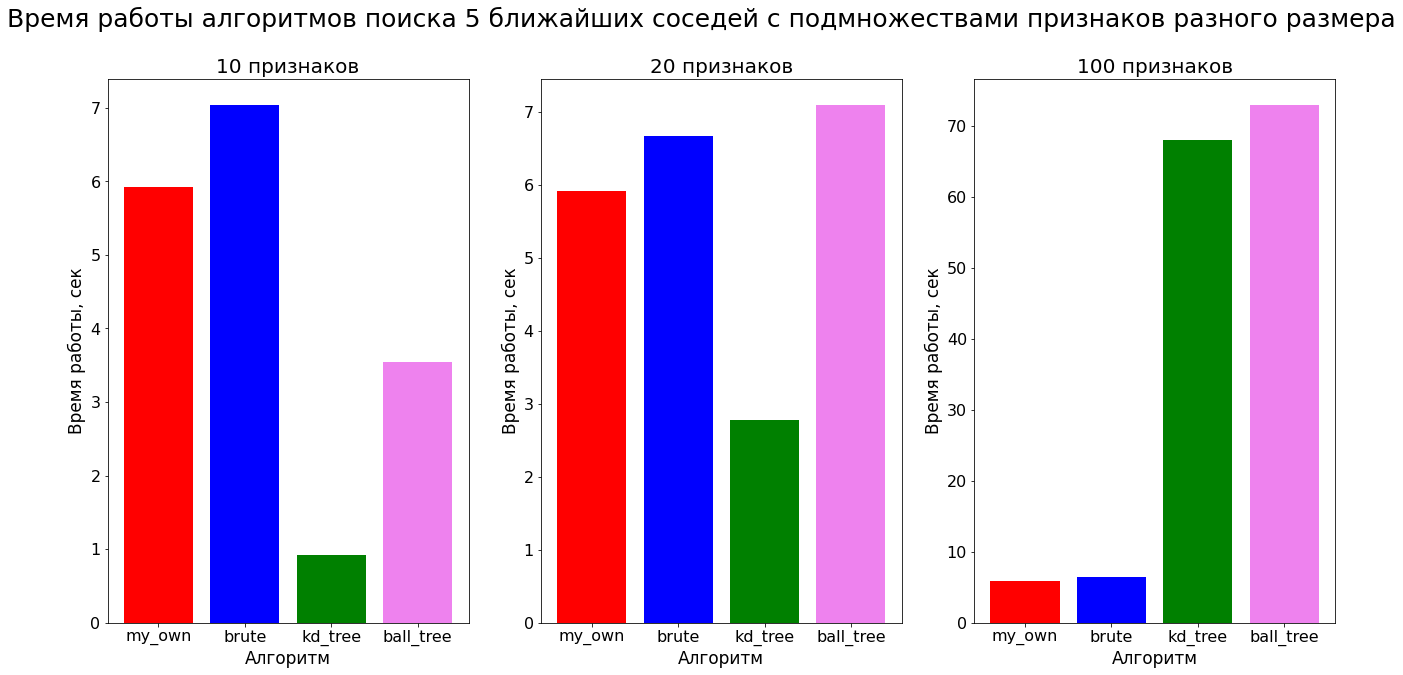

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(22, 10))
fig.suptitle('Время работы алгоритмов поиска 5 ближайших соседей с подмножествами признаков разного размера', fontsize=25)
plt.subplot(131)
plt.bar(['my_own', 'brute', 'kd_tree', 'ball_tree'], [5.92, 7.04, 0.925, 3.54], color=['red', 'blue', 'green', 'violet'])
plt.title('10 признаков', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.xlabel('Алгоритм', fontsize=17)
plt.ylabel('Время работы, сек', fontsize=17)
plt.yticks(np.arange(8))
plt.subplot(132)
plt.bar(['my_own', 'brute', 'kd_tree', 'ball_tree'], [5.92, 6.67, 2.78, 7.1], color=['red', 'blue', 'green', 'violet'])
plt.title('20 признаков', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.xlabel('Алгоритм', fontsize=17)
plt.ylabel('Время работы, сек', fontsize=17)
plt.yticks(np.arange(8))
plt.subplot(133)
plt.bar(['my_own', 'brute', 'kd_tree', 'ball_tree'], [5.87, 6.39, 68, 73], color=['red', 'blue', 'green', 'violet'])
plt.title('100 признаков', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.xlabel('Алгоритм', fontsize=17)
plt.ylabel('Время работы, сек', fontsize=17)
plt.yticks(np.arange(0, 71, 10))
plt.show()

In [30]:
fig.savefig('fig1.pdf', format='pdf', dpi=600)

In [3]:
x_train, x_test, y_train, y_test = mnist.data[0:60000, :], mnist.data[60000:, :], \
                                   mnist.target[0:60000], mnist.target[60000:]

In [4]:
%%time

res_dict_euclid = knn_cross_val_score(x_train, y_train, [i for i in range(1, 11)], strategy='my_own', 
                                      metric='euclidean', test_block_size=5000)

Wall time: 2min 33s


In [5]:
%%time

res_dict_cosine = knn_cross_val_score(x_train, y_train, [i for i in range(1, 11)], strategy='my_own', 
                                      metric='cosine', test_block_size=5000)

Wall time: 2min 36s


In [6]:
res_dict_euclid

{1: array([0.96975, 0.97005, 0.9709 ]),
 2: array([0.96975, 0.97005, 0.9709 ]),
 3: array([0.97045, 0.97135, 0.9717 ]),
 4: array([0.97015, 0.97045, 0.971  ]),
 5: array([0.96935, 0.96935, 0.96955]),
 6: array([0.9687, 0.9686, 0.9697]),
 7: array([0.968  , 0.9676 , 0.96825]),
 8: array([0.9669 , 0.96755, 0.9679 ]),
 9: array([0.96545, 0.9664 , 0.9672 ]),
 10: array([0.9649 , 0.9655 , 0.96715])}

In [7]:
res_dict_cosine

{1: array([0.97385, 0.97365, 0.9721 ]),
 2: array([0.97385, 0.97365, 0.9721 ]),
 3: array([0.9742, 0.975 , 0.9733]),
 4: array([0.9742 , 0.97475, 0.973  ]),
 5: array([0.97265, 0.97525, 0.97255]),
 6: array([0.97215, 0.97495, 0.9725 ]),
 7: array([0.9718, 0.9736, 0.9709]),
 8: array([0.97135, 0.9737 , 0.9706 ]),
 9: array([0.97   , 0.97255, 0.9695 ]),
 10: array([0.97005, 0.9721 , 0.96945])}

In [8]:
res_euclid_mean = np.array(list(map(lambda x: res_dict_euclid[x].mean(), res_dict_euclid)))
res_euclid_mean

array([0.97023333, 0.97023333, 0.97116667, 0.97053333, 0.96941667,
       0.969     , 0.96795   , 0.96745   , 0.96635   , 0.96585   ])

In [9]:
res_cosine_mean = np.array(list(map(lambda x: res_dict_cosine[x].mean(), res_dict_cosine)))
res_cosine_mean

array([0.9732    , 0.9732    , 0.97416667, 0.97398333, 0.97348333,
       0.9732    , 0.9721    , 0.97188333, 0.97068333, 0.97053333])

In [10]:
print(np.argmax(res_euclid_mean) + 1, np.argmax(res_cosine_mean) + 1)

3 3


In [11]:
print(np.max(res_euclid_mean), np.max(res_cosine_mean))

0.9711666666666666 0.9741666666666666


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


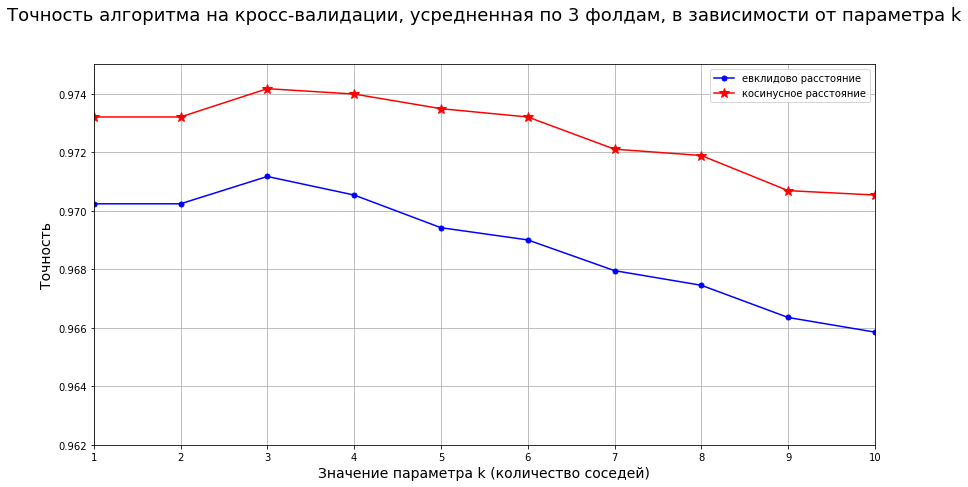

In [12]:
fig = plt.figure(figsize=(14, 7))
plt.plot(np.arange(1, 11), res_euclid_mean, color='blue', marker='.', ms=10, label='евклидово расстояние')
plt.plot(np.arange(1, 11), res_cosine_mean, color='red', marker='*', ms=10, label='косинусное расстояние')
plt.title('Точность алгоритма на кросс-валидации, усредненная по 3 фолдам, в зависимости от параметра k', fontsize=18, y=1.1)
plt.xlabel('Значение параметра k (количество соседей)', fontsize=14)
plt.ylabel('Точность', fontsize=14)
plt.xlim([1, 10])
plt.ylim([0.962, 0.975])
plt.legend()
plt.grid()
plt.show()

In [14]:
fig.savefig('fig2.pdf', format='pdf', dpi=600)

In [4]:
%%time

res_dict_euclid_weighted = knn_cross_val_score(x_train, y_train, [i for i in range(1, 11)], strategy='my_own', 
                                               metric='euclidean', weights=True, test_block_size=5000)

Wall time: 2min 57s


In [16]:
%%time

res_dict_cosine_weighted = knn_cross_val_score(x_train, y_train, [i for i in range(1, 11)], strategy='my_own', 
                                               metric='cosine', weights=True, test_block_size=5000)

Wall time: 2min 59s


In [17]:
res_dict_euclid_weighted

{1: array([0.9686 , 0.9707 , 0.96955]),
 2: array([0.9686 , 0.9707 , 0.96955]),
 3: array([0.97045, 0.97125, 0.97025]),
 4: array([0.97215, 0.97195, 0.971  ]),
 5: array([0.96925, 0.97055, 0.9688 ]),
 6: array([0.96995, 0.97115, 0.9697 ]),
 7: array([0.96755, 0.96895, 0.96715]),
 8: array([0.96735, 0.96965, 0.9676 ]),
 9: array([0.9664, 0.9671, 0.9656]),
 10: array([0.9665 , 0.96745, 0.96585])}

In [18]:
res_dict_cosine_weighted

{1: array([0.97345, 0.97245, 0.9728 ]),
 2: array([0.97345, 0.97245, 0.9728 ]),
 3: array([0.97545, 0.97495, 0.9741 ]),
 4: array([0.976  , 0.9755 , 0.97455]),
 5: array([0.9747, 0.9735, 0.9738]),
 6: array([0.97505, 0.9739 , 0.97445]),
 7: array([0.97325, 0.9718 , 0.97265]),
 8: array([0.9733 , 0.97225, 0.9733 ]),
 9: array([0.97265, 0.9704 , 0.97165]),
 10: array([0.9723 , 0.97055, 0.97215])}

In [19]:
res_euclid_mean_weighted = np.array(list(map(lambda x: res_dict_euclid_weighted[x].mean(), res_dict_euclid_weighted)))
res_euclid_mean_weighted

array([0.96961667, 0.96961667, 0.97065   , 0.9717    , 0.96953333,
       0.97026667, 0.96788333, 0.9682    , 0.96636667, 0.9666    ])

In [20]:
res_cosine_mean_weighted = np.array(list(map(lambda x: res_dict_cosine_weighted[x].mean(), res_dict_cosine_weighted)))
res_cosine_mean_weighted

array([0.9729    , 0.9729    , 0.97483333, 0.97535   , 0.974     ,
       0.97446667, 0.97256667, 0.97295   , 0.97156667, 0.97166667])

In [21]:
print(np.argmax(res_euclid_mean_weighted) + 1, np.argmax(res_cosine_mean_weighted) + 1)

4 4


In [22]:
print(np.max(res_euclid_mean_weighted), np.max(res_cosine_mean_weighted))

0.9716999999999999 0.97535


In [23]:
res_euclid_mean_weighted >= res_euclid_mean

array([False, False, False,  True,  True,  True, False,  True,  True,
        True])

In [24]:
res_cosine_mean_weighted >= res_cosine_mean

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True])

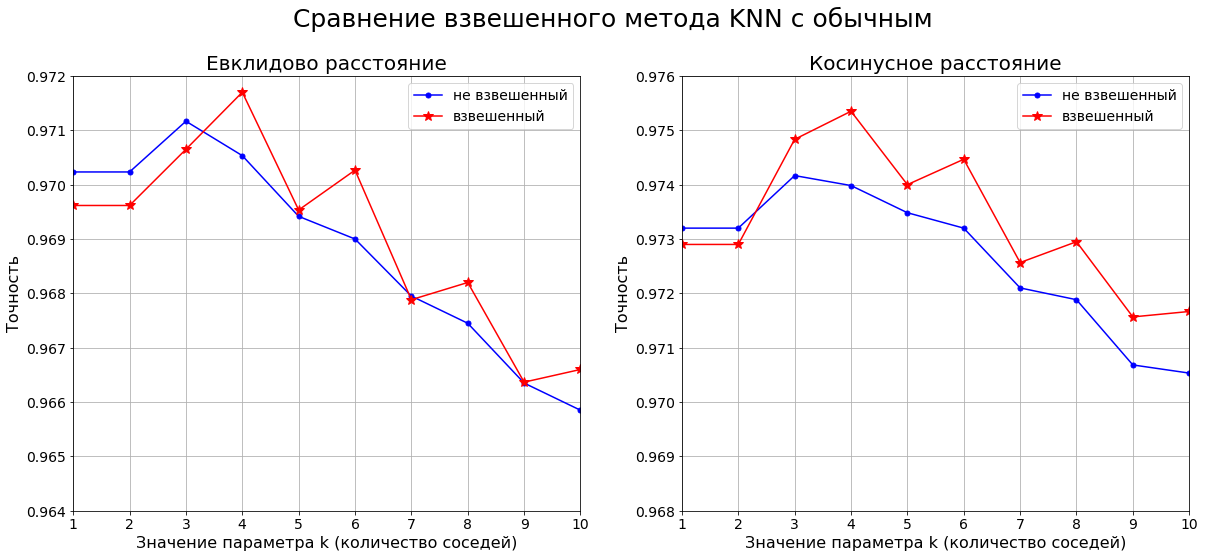

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Сравнение взвешенного метода KNN с обычным', fontsize=25, y=1.0)
plt.subplot(121)
plt.plot(np.arange(1, 11), res_euclid_mean, color='blue', marker='.', ms=10, label='не взвешенный')
plt.plot(np.arange(1, 11), res_euclid_mean_weighted, color='red', marker='*', ms=10, label='взвешенный')
plt.title('Евклидово расстояние', fontsize=20)
plt.xlabel('Значение параметра k (количество соседей)', fontsize=16)
plt.ylabel('Точность', fontsize=16)
plt.xlim([1, 10])
plt.ylim([0.964, 0.972])
plt.tick_params(axis='both', labelsize=14)
plt.legend(prop={'size': 14})
plt.grid()
plt.subplot(122)
plt.plot(np.arange(1, 11), res_cosine_mean, color='blue', marker='.', ms=10, label='не взвешенный')
plt.plot(np.arange(1, 11), res_cosine_mean_weighted, color='red', marker='*', ms=10, label='взвешенный')
plt.title('Косинусное расстояние', fontsize=20)
plt.xlabel('Значение параметра k (количество соседей)', fontsize=16)
plt.ylabel('Точность', fontsize=16)
plt.xlim([1, 10])
plt.ylim([0.968, 0.976])
plt.tick_params(axis='both', labelsize=14)
plt.legend(prop={'size': 14})
plt.grid()
plt.show()

In [31]:
fig.savefig('fig3.pdf', format='pdf', dpi=600)

In [33]:
knn = KNNClassifier(k=4, strategy='my_own', metric='cosine', weights=True, test_block_size=5000)
knn.fit(x_train, y_train)
res = knn.predict(x_test)
print((res == y_test).sum() / res.shape[0])

0.9752


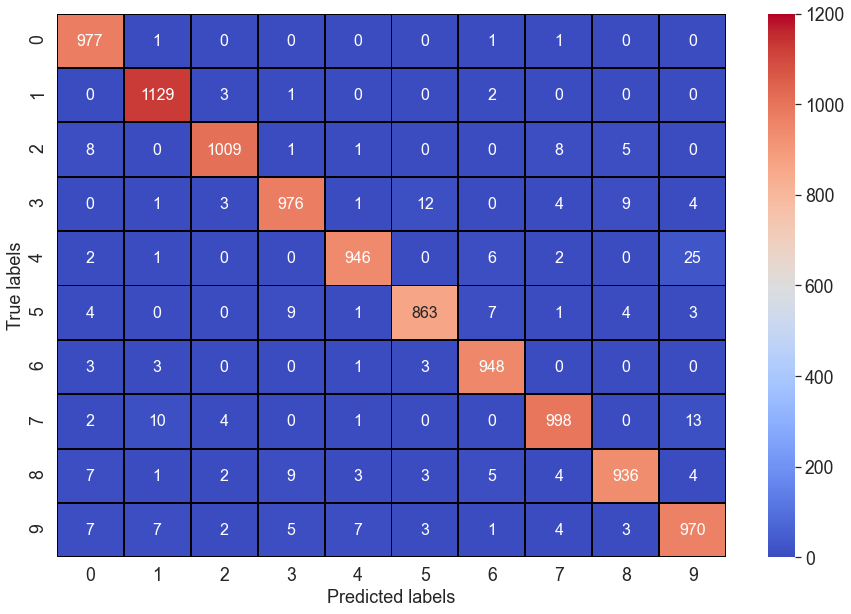

In [55]:
cm = confusion_matrix(y_test, res)
fig = plt.figure(figsize=(15, 10))
sns.set(font_scale=1.6)
ax = sns.heatmap(cm, annot=True, cmap='coolwarm', vmin=0, vmax=1200, center=600, linewidths=1, linecolor='black', annot_kws={'size': 16}, fmt='.10g')
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
plt.show()

In [56]:
fig.savefig('fig4.pdf', format='pdf', dpi=600)

In [32]:
Counter(y_test)

Counter({'7': 1028,
         '2': 1032,
         '1': 1135,
         '0': 980,
         '4': 982,
         '9': 1009,
         '5': 892,
         '6': 958,
         '3': 1010,
         '8': 974})

In [57]:
Counter(y_test[y_test != res])

Counter({'4': 36,
         '9': 39,
         '2': 23,
         '7': 30,
         '6': 10,
         '3': 34,
         '8': 38,
         '5': 29,
         '1': 6,
         '0': 3})

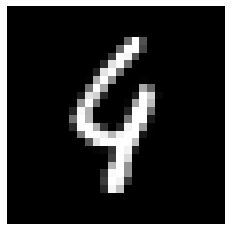

In [34]:
fig = plt.figure()
ax = plt.imshow(x_test[y_test != res][0].reshape((28, 28)), cmap='gray')
plt.grid(False)
plt.axis('off')
fig.savefig('num1.pdf', format='pdf', dpi=600)

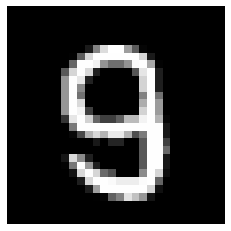

In [35]:
fig = plt.figure()
ax = plt.imshow(x_test[y_test != res][1].reshape((28, 28)), cmap='gray')
plt.grid(False)
plt.axis('off')
fig.savefig('num2.pdf', format='pdf', dpi=600)

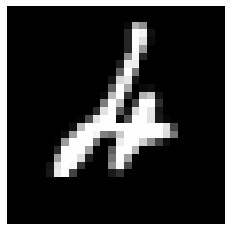

In [36]:
fig = plt.figure()
ax = plt.imshow(x_test[y_test != res][2].reshape((28, 28)), cmap='gray')
plt.grid(False)
plt.axis('off')
fig.savefig('num3.pdf', format='pdf', dpi=600)

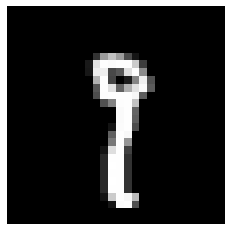

In [37]:
fig = plt.figure()
ax = plt.imshow(x_test[y_test != res][3].reshape((28, 28)), cmap='gray')
plt.grid(False)
plt.axis('off')
fig.savefig('num4.pdf', format='pdf', dpi=600)

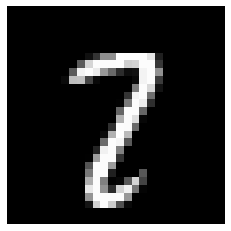

In [38]:
fig = plt.figure()
ax = plt.imshow(x_test[y_test != res][4].reshape((28, 28)), cmap='gray')
plt.grid(False)
plt.axis('off')
fig.savefig('num5.pdf', format='pdf', dpi=600)

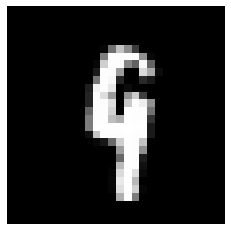

In [39]:
fig = plt.figure()
ax = plt.imshow(x_test[y_test != res][100].reshape((28, 28)), cmap='gray')
plt.grid(False)
plt.axis('off')
fig.savefig('num6.pdf', format='pdf', dpi=600)

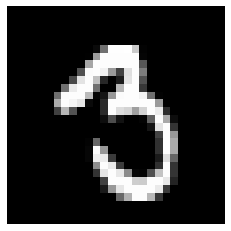

In [40]:
fig = plt.figure()
ax = plt.imshow(x_test[y_test != res][200].reshape((28, 28)), cmap='gray')
plt.grid(False)
plt.axis('off')
fig.savefig('num7.pdf', format='pdf', dpi=600)

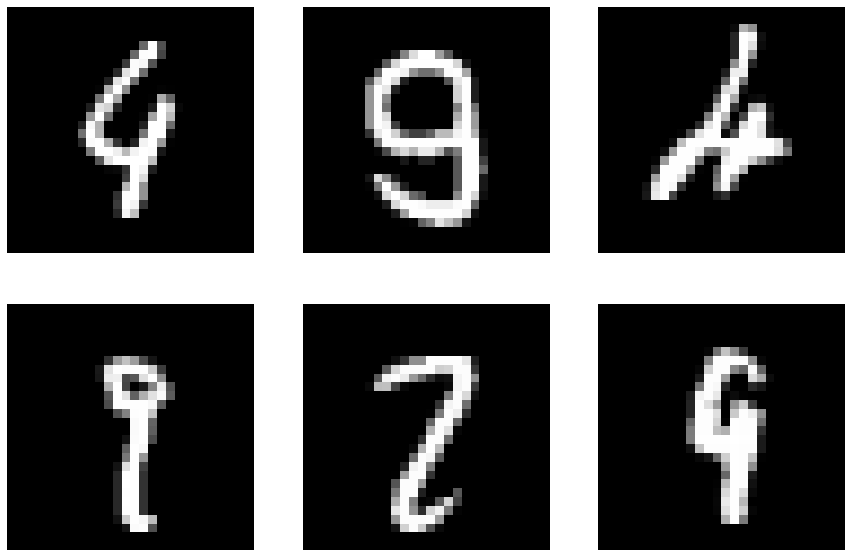

In [50]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
plt.subplot(231)
plt.imshow(x_test[y_test != res][0].reshape((28, 28)), cmap='gray')
plt.grid(False)
plt.axis('off')
plt.subplot(232)
plt.imshow(x_test[y_test != res][1].reshape((28, 28)), cmap='gray')
plt.grid(False)
plt.axis('off')
plt.subplot(233)
plt.imshow(x_test[y_test != res][2].reshape((28, 28)), cmap='gray')
plt.grid(False)
plt.axis('off')
plt.subplot(234)
plt.imshow(x_test[y_test != res][3].reshape((28, 28)), cmap='gray')
plt.grid(False)
plt.axis('off')
plt.subplot(235)
plt.imshow(x_test[y_test != res][4].reshape((28, 28)), cmap='gray')
plt.grid(False)
plt.axis('off')
plt.subplot(236)
plt.imshow(x_test[y_test != res][100].reshape((28, 28)), cmap='gray')
plt.grid(False)
plt.axis('off')
fig.savefig('num_all.pdf', format='pdf', dpi=600)

In [65]:
x_train_rot_left = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), 5).ravel(), axis=1, arr=x_train)
x_train_rot_right = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), -5).ravel(), axis=1, arr=x_train)
x_train_rot = np.vstack((x_train, x_train_rot_left, x_train_rot_right))
y_train_rot = np.tile(y_train, 3)
res_dict_rot = knn_cross_val_score(x_train_rot, y_train_rot, [3, 4, 5], metric='cosine', weights=True, test_block_size=2000)

In [66]:
res_dict_rot

{3: array([0.99418333, 0.99438333, 0.99408333]),
 4: array([0.9936    , 0.9937    , 0.99363333]),
 5: array([0.9923    , 0.99221667, 0.9926    ])}

In [67]:
print(res_dict_rot[3].mean(), res_dict_rot[4].mean(), res_dict_rot[5].mean())

0.9942166666666666 0.9936444444444446 0.9923722222222221


In [68]:
x_train_rot_left = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), 10).ravel(), axis=1, arr=x_train)
x_train_rot_right = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), -10).ravel(), axis=1, arr=x_train)
x_train_rot = np.vstack((x_train, x_train_rot_left, x_train_rot_right))
y_train_rot = np.tile(y_train, 3)
res_dict_rot = knn_cross_val_score(x_train_rot, y_train_rot, [3, 4, 5], metric='cosine', weights=True, test_block_size=2000)

In [69]:
res_dict_rot

{3: array([0.98321667, 0.98433333, 0.98421667]),
 4: array([0.98365   , 0.98433333, 0.98455   ]),
 5: array([0.98151667, 0.98276667, 0.9825    ])}

In [70]:
print(res_dict_rot[3].mean(), res_dict_rot[4].mean(), res_dict_rot[5].mean())

0.9839222222222221 0.9841777777777777 0.9822611111111111


In [71]:
x_train_rot_left = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), 15).ravel(), axis=1, arr=x_train)
x_train_rot_right = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), -15).ravel(), axis=1, arr=x_train)
x_train_rot = np.vstack((x_train, x_train_rot_left, x_train_rot_right))
y_train_rot = np.tile(y_train, 3)
res_dict_rot = knn_cross_val_score(x_train_rot, y_train_rot, [3, 4, 5], metric='cosine', weights=True, test_block_size=2000)

In [72]:
res_dict_rot

{3: array([0.97833333, 0.97725   , 0.97775   ]),
 4: array([0.97885   , 0.97798333, 0.97833333]),
 5: array([0.9771    , 0.97705   , 0.97706667])}

In [73]:
print(res_dict_rot[3].mean(), res_dict_rot[4].mean(), res_dict_rot[5].mean())

0.9777777777777777 0.978388888888889 0.9770722222222221


In [74]:
x_train_sh_left_x = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), x=-1).ravel(), axis=1, arr=x_train)
x_train_sh_right_x = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), x=1).ravel(), axis=1, arr=x_train)
x_train_sh_down_y = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), y=-1).ravel(), axis=1, arr=x_train)
x_train_sh_up_y = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), y=1).ravel(), axis=1, arr=x_train)
x_train_sh = np.vstack((x_train, x_train_sh_left_x, x_train_sh_right_x, x_train_sh_down_y, x_train_sh_up_y))
y_train_sh = np.tile(y_train, 5)
res_dict_sh = knn_cross_val_score(x_train_sh, y_train_sh, [3, 4, 5], metric='cosine', weights=True, test_block_size=500)

In [75]:
res_dict_sh

{3: array([0.98575, 0.98559, 0.98524]),
 4: array([0.9862 , 0.98599, 0.98586]),
 5: array([0.98447, 0.98427, 0.98378])}

In [76]:
print(res_dict_sh[3].mean(), res_dict_sh[4].mean(), res_dict_sh[5].mean())

0.9855266666666668 0.9860166666666667 0.9841733333333332


In [77]:
x_train_sh_left_x = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), x=-2).ravel(), axis=1, arr=x_train)
x_train_sh_right_x = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), x=2).ravel(), axis=1, arr=x_train)
x_train_sh_down_y = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), y=-2).ravel(), axis=1, arr=x_train)
x_train_sh_up_y = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), y=2).ravel(), axis=1, arr=x_train)
x_train_sh = np.vstack((x_train, x_train_sh_left_x, x_train_sh_right_x, x_train_sh_down_y, x_train_sh_up_y))
y_train_sh = np.tile(y_train, 5)
res_dict_sh = knn_cross_val_score(x_train_sh, y_train_sh, [3, 4, 5], metric='cosine', weights=True, test_block_size=500)

In [78]:
res_dict_sh

{3: array([0.97574, 0.97537, 0.9759 ]),
 4: array([0.97647, 0.97637, 0.97651]),
 5: array([0.97514, 0.97548, 0.97474])}

In [79]:
print(res_dict_sh[3].mean(), res_dict_sh[4].mean(), res_dict_sh[5].mean())

0.97567 0.9764499999999999 0.97512


In [80]:
x_train_sh_left_x = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), x=-3).ravel(), axis=1, arr=x_train)
x_train_sh_right_x = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), x=3).ravel(), axis=1, arr=x_train)
x_train_sh_down_y = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), y=-3).ravel(), axis=1, arr=x_train)
x_train_sh_up_y = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), y=3).ravel(), axis=1, arr=x_train)
x_train_sh = np.vstack((x_train, x_train_sh_left_x, x_train_sh_right_x, x_train_sh_down_y, x_train_sh_up_y))
y_train_sh = np.tile(y_train, 5)
res_dict_sh = knn_cross_val_score(x_train_sh, y_train_sh, [3, 4, 5], metric='cosine', weights=True, test_block_size=500)

In [81]:
res_dict_sh

{3: array([0.97564, 0.97466, 0.97532]),
 4: array([0.97623, 0.97575, 0.97597]),
 5: array([0.97465, 0.97384, 0.97406])}

In [82]:
print(res_dict_sh[3].mean(), res_dict_sh[4].mean(), res_dict_sh[5].mean())

0.9752066666666667 0.9759833333333333 0.9741833333333334


In [83]:
x_train_bl_tmp = np.apply_along_axis(lambda x: filters.gaussian(x.reshape((28, 28)), sigma=0.5).ravel(), axis=1, arr=x_train)
x_train_bl = np.vstack((x_train, x_train_bl_tmp))
y_train_bl = np.tile(y_train, 2)
res_dict_bl = knn_cross_val_score(x_train_bl, y_train_bl, [3, 4, 5], metric='cosine', weights=True, test_block_size=2000)

In [84]:
res_dict_bl

{3: array([0.9915  , 0.99255 , 0.992475]),
 4: array([0.99145 , 0.992775, 0.992925]),
 5: array([0.991675, 0.992875, 0.992675])}

In [85]:
print(res_dict_bl[3].mean(), res_dict_bl[4].mean(), res_dict_bl[5].mean())

0.992175 0.9923833333333333 0.9924083333333332


In [86]:
x_train_bl_tmp = np.apply_along_axis(lambda x: filters.gaussian(x.reshape((28, 28)), sigma=1.0).ravel(), axis=1, arr=x_train)
x_train_bl = np.vstack((x_train, x_train_bl_tmp))
y_train_bl = np.tile(y_train, 2)
res_dict_bl = knn_cross_val_score(x_train_bl, y_train_bl, [3, 4, 5], metric='cosine', weights=True, test_block_size=2000)

In [87]:
res_dict_bl

{3: array([0.989275, 0.9887  , 0.988475]),
 4: array([0.98855 , 0.98785 , 0.987675]),
 5: array([0.986825, 0.986   , 0.986175])}

In [88]:
print(res_dict_bl[3].mean(), res_dict_bl[4].mean(), res_dict_bl[5].mean())

0.9888166666666667 0.9880249999999999 0.9863333333333332


In [89]:
x_train_bl_tmp = np.apply_along_axis(lambda x: filters.gaussian(x.reshape((28, 28)), sigma=1.5).ravel(), axis=1, arr=x_train)
x_train_bl = np.vstack((x_train, x_train_bl_tmp))
y_train_bl = np.tile(y_train, 2)
res_dict_bl = knn_cross_val_score(x_train_bl, y_train_bl, [3, 4, 5], metric='cosine', weights=True, test_block_size=2000)

In [90]:
res_dict_bl

{3: array([0.98025 , 0.979625, 0.980475]),
 4: array([0.980825, 0.980125, 0.981375]),
 5: array([0.979125, 0.977675, 0.97955 ])}

In [91]:
print(res_dict_bl[3].mean(), res_dict_bl[4].mean(), res_dict_bl[5].mean())

0.9801166666666665 0.980775 0.9787833333333333


In [92]:
x_train_rot_left = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), 5).ravel(), axis=1, arr=x_train)
x_train_rot_right = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), -5).ravel(), axis=1, arr=x_train)
x_train_sh_left_x = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), x=-1).ravel(), axis=1, arr=x_train)
x_train_sh_right_x = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), x=1).ravel(), axis=1, arr=x_train)
x_train_sh_down_y = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), y=-1).ravel(), axis=1, arr=x_train)
x_train_sh_up_y = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), y=1).ravel(), axis=1, arr=x_train)
x_train_bl_tmp = np.apply_along_axis(lambda x: filters.gaussian(x.reshape((28, 28)), sigma=0.5).ravel(), axis=1, arr=x_train)
x_train_mix = np.vstack((x_train, x_train_rot_left, x_train_rot_right, x_train_sh_left_x, x_train_sh_right_x, x_train_sh_down_y, x_train_sh_up_y, x_train_bl_tmp))
y_train_mix = np.tile(y_train, 8)
res_dict_mix = knn_cross_val_score(x_train_mix, y_train_mix, [3, 4, 5], metric='cosine', weights=True, test_block_size=200)

In [93]:
res_dict_mix

{3: array([0.99441875, 0.9942625 , 0.99400625]),
 4: array([0.9944625 , 0.994375  , 0.99414375]),
 5: array([0.99345625, 0.99333125, 0.9932625 ])}

In [94]:
print(res_dict_mix[3].mean(), res_dict_mix[4].mean(), res_dict_mix[5].mean())

0.9942291666666666 0.9943270833333333 0.9933500000000001


In [95]:
x_train_rot_left = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), 5).ravel(), axis=1, arr=x_train)
x_train_rot_right = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), -5).ravel(), axis=1, arr=x_train)
x_train_bl_tmp = np.apply_along_axis(lambda x: filters.gaussian(x.reshape((28, 28)), sigma=0.5).ravel(), axis=1, arr=x_train)
x_train_mix = np.vstack((x_train, x_train_rot_left, x_train_rot_right, x_train_bl_tmp))
y_train_mix = np.tile(y_train, 4)
res_dict_mix = knn_cross_val_score(x_train_mix, y_train_mix, [3, 4, 5], metric='cosine', weights=True, test_block_size=1500)

In [96]:
res_dict_mix

{3: array([0.9978375, 0.997975 , 0.9973125]),
 4: array([0.9972875, 0.997775 , 0.9970875]),
 5: array([0.9967   , 0.9971375, 0.9963625])}

In [97]:
print(res_dict_mix[3].mean(), res_dict_mix[4].mean(), res_dict_mix[5].mean())

0.9977083333333333 0.9973833333333334 0.9967333333333334


In [ ]:
# These cross-validations were incorrect

In [4]:
# rotations 5, blur 0.5
cv = knn_cross_val_score_aug(x_train, y_train, [3, 4, 5], strategy='my_own', metric='cosine',
                             weights=True, test_block_size=2000)
print(cv[3].mean(), cv[4].mean(), cv[5].mean())

0.9803833333333333 0.9807 0.9800333333333332


In [4]:
# rotations 5
cv = knn_cross_val_score_aug(x_train, y_train, [3, 4, 5], strategy='my_own', metric='cosine',
                             weights=True, test_block_size=2000)
print(cv[3].mean(), cv[4].mean(), cv[5].mean())

0.9799333333333333 0.9807333333333333 0.9802166666666666


In [4]:
# rotations 10
cv = knn_cross_val_score_aug(x_train, y_train, [3, 4, 5], strategy='my_own', metric='cosine',
                             weights=True, test_block_size=2000)
print(cv[3].mean(), cv[4].mean(), cv[5].mean())

0.9800833333333333 0.9806333333333335 0.9797333333333333


In [4]:
# rotations 15
cv = knn_cross_val_score_aug(x_train, y_train, [3, 4, 5], strategy='my_own', metric='cosine',
                             weights=True, test_block_size=2000)
print(cv[3].mean(), cv[4].mean(), cv[5].mean())

0.9785833333333334 0.9789833333333333 0.9782000000000001


In [4]:
# blur 0.5
cv = knn_cross_val_score_aug(x_train, y_train, [3, 4, 5], strategy='my_own', metric='cosine',
                             weights=True, test_block_size=5000)
print(cv[3].mean(), cv[4].mean(), cv[5].mean())

0.9766833333333333 0.9765833333333335 0.9772666666666666


In [4]:
# blur 1.0
cv = knn_cross_val_score_aug(x_train, y_train, [3, 4, 5], strategy='my_own', metric='cosine',
                             weights=True, test_block_size=5000)
print(cv[3].mean(), cv[4].mean(), cv[5].mean())

0.9800333333333334 0.9807333333333333 0.9804333333333334


In [4]:
# blur 1.5
cv = knn_cross_val_score_aug(x_train, y_train, [3, 4, 5], strategy='my_own', metric='cosine',
                             weights=True, test_block_size=5000)
print(cv[3].mean(), cv[4].mean(), cv[5].mean())

0.9782333333333333 0.9786833333333332 0.9782166666666666


In [4]:
# shift 1
cv = knn_cross_val_score_aug(x_train, y_train, [3, 4, 5], strategy='my_own', metric='cosine',
                             weights=True, test_block_size=1000)
print(cv[3].mean(), cv[4].mean(), cv[5].mean())

0.9815833333333334 0.9817999999999999 0.9817333333333332


In [4]:
# shift 2
cv = knn_cross_val_score_aug(x_train, y_train, [3, 4, 5], strategy='my_own', metric='cosine',
                             weights=True, test_block_size=1000)
print(cv[3].mean(), cv[4].mean(), cv[5].mean())

0.9772 0.9777833333333333 0.9772500000000001


In [4]:
# shift 3
cv = knn_cross_val_score_aug(x_train, y_train, [3, 4, 5], strategy='my_own', metric='cosine',
                             weights=True, test_block_size=1000)
print(cv[3].mean(), cv[4].mean(), cv[5].mean())

0.9755333333333333 0.9761833333333333 0.9747666666666667


In [4]:
# shift 1, rotation 5
cv = knn_cross_val_score_aug(x_train, y_train, [3, 4, 5], strategy='my_own', metric='cosine',
                             weights=True, test_block_size=1000)
print(cv[3].mean(), cv[4].mean(), cv[5].mean())

0.9831166666666666 0.9838666666666667 0.9832166666666667


In [4]:
# shift 1, blur 1.0
cv = knn_cross_val_score_aug(x_train, y_train, [3, 4, 5], strategy='my_own', metric='cosine',
                             weights=True, test_block_size=1000)
print(cv[3].mean(), cv[4].mean(), cv[5].mean())

0.9824 0.9826666666666667 0.9825


In [4]:
# shift 1, blur 1.0, rotation 5
cv = knn_cross_val_score_aug(x_train, y_train, [3, 4, 5], strategy='my_own', metric='cosine',
                             weights=True, test_block_size=1000)
print(cv[3].mean(), cv[4].mean(), cv[5].mean())

0.9833166666666667 0.9836333333333332 0.9838


In [4]:
# blur 1.0, rotation 5
cv = knn_cross_val_score_aug(x_train, y_train, [3, 4, 5], strategy='my_own', metric='cosine',
                             weights=True, test_block_size=2000)
print(cv[3].mean(), cv[4].mean(), cv[5].mean())

0.9817499999999999 0.98225 0.9820666666666665


In [4]:
x_train_rot_left = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), 5).ravel(), axis=1, arr=x_train)
x_train_rot_right = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), -5).ravel(), axis=1, arr=x_train)
x_train_sh_left_x = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), x=-1).ravel(), axis=1, arr=x_train)
x_train_sh_right_x = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), x=1).ravel(), axis=1, arr=x_train)
x_train_sh_down_y = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), y=-1).ravel(), axis=1, arr=x_train)
x_train_sh_up_y = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), y=1).ravel(), axis=1, arr=x_train)
x_train_mix = np.vstack((x_train, x_train_rot_left, x_train_rot_right, x_train_sh_left_x, x_train_sh_right_x, 
                         x_train_sh_down_y, x_train_sh_up_y))
y_train_mix = np.tile(y_train, 7)
knn = KNNClassifier(k=4, strategy='my_own', metric='cosine', weights=True, test_block_size=1000)
knn.fit(x_train_mix, y_train_mix)
res = knn.predict(x_test)
print((res == y_test).sum() / res.shape[0])

0.9824


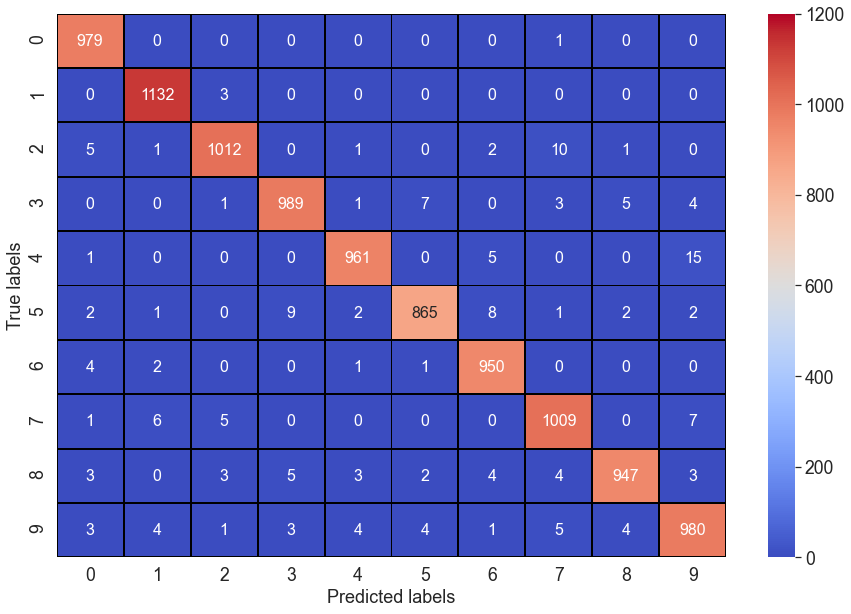

In [5]:
cm = confusion_matrix(y_test, res)
fig = plt.figure(figsize=(15, 10))
sns.set(font_scale=1.6)
ax = sns.heatmap(cm, annot=True, cmap='coolwarm', vmin=0, vmax=1200, center=600, linewidths=1, linecolor='black', annot_kws={'size': 16}, fmt='.10g')
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
plt.show()

In [6]:
fig.savefig('fig5_correct.pdf', format='pdf', dpi=600)

In [98]:
x_train_rot_left = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), 5).ravel(), axis=1, arr=x_train)
x_train_rot_right = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), -5).ravel(), axis=1, arr=x_train)
x_train_bl_tmp = np.apply_along_axis(lambda x: filters.gaussian(x.reshape((28, 28)), sigma=0.5).ravel(), axis=1, arr=x_train)
x_train_mix = np.vstack((x_train, x_train_rot_left, x_train_rot_right, x_train_bl_tmp))
y_train_mix = np.tile(y_train, 4)
knn = KNNClassifier(k=3, strategy='my_own', metric='cosine', weights=True, test_block_size=1000)
knn.fit(x_train_mix, y_train_mix)
res = knn.predict(x_test)
print((res == y_test).sum() / res.shape[0])

0.978


In [99]:
knn = KNNClassifier(k=4, strategy='my_own', metric='cosine', weights=True, test_block_size=1000)
knn.fit(x_train_mix, y_train_mix)
res2 = knn.predict(x_test)
print((res2 == y_test).sum() / res2.shape[0])

0.9783


In [100]:
knn = KNNClassifier(k=5, strategy='my_own', metric='cosine', weights=True, test_block_size=1000)
knn.fit(x_train_mix, y_train_mix)
res3 = knn.predict(x_test)
print((res3 == y_test).sum() / res3.shape[0])

0.9793


In [101]:
knn = KNNClassifier(k=6, strategy='my_own', metric='cosine', weights=True, test_block_size=1000)
knn.fit(x_train_mix, y_train_mix)
res4 = knn.predict(x_test)
print((res4 == y_test).sum() / res4.shape[0])

0.9787


In [102]:
cm = confusion_matrix(y_test, res3)
print(cm)

[[ 978    1    0    0    0    0    0    1    0    0]
 [   0 1131    3    0    0    0    1    0    0    0]
 [   7    1 1009    1    1    0    1   10    2    0]
 [   0    0    1  987    1    7    0    4    6    4]
 [   2    1    0    0  954    0    5    2    0   18]
 [   2    1    0   10    2  865    5    1    3    3]
 [   4    3    0    0    2    3  946    0    0    0]
 [   1    8    5    1    0    0    0 1004    0    9]
 [   4    0    2    9    4    4    4    4  940    3]
 [   1    5    2    5    4    3    1    5    4  979]]


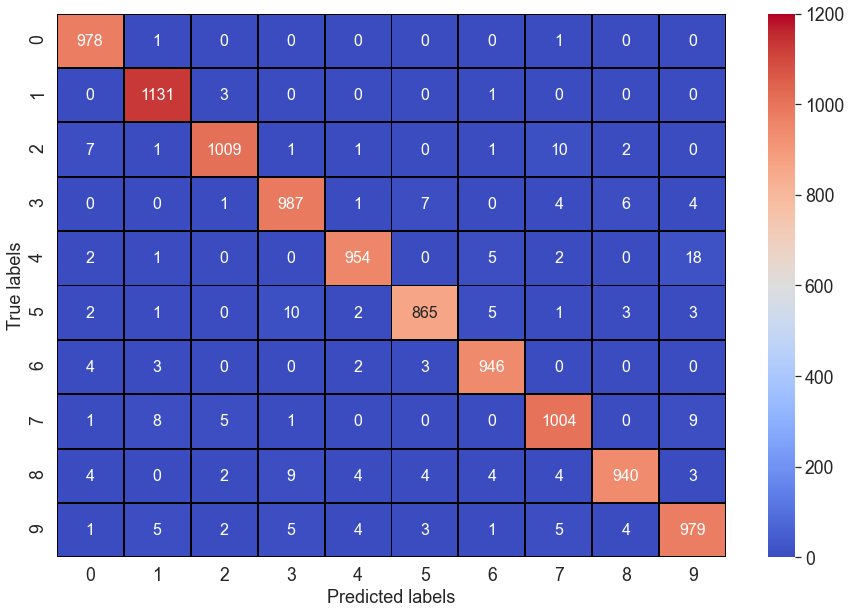

In [103]:
fig = plt.figure(figsize=(15, 10))
sns.set(font_scale=1.6)
ax = sns.heatmap(cm, annot=True, cmap='coolwarm', vmin=0, vmax=1200, center=600, linewidths=1, linecolor='black', annot_kws={'size': 16}, fmt='.10g')
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
plt.show()

In [104]:
fig.savefig('fig5.pdf', format='pdf', dpi=600)

In [105]:
x_test_rot_left = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), 5).ravel(), axis=1, arr=x_test)
x_test_rot_right = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), -5).ravel(), axis=1, arr=x_test)

In [106]:
knn = KNNClassifier(k=3, strategy='my_own', metric='cosine', weights=True, test_block_size=5000)
knn.fit(x_train, y_train)
res_simple = knn.predict(x_test)
res_rot_left = knn.predict(x_test_rot_left)
res_rot_right = knn.predict(x_test_rot_right)
res_blur = knn.predict(x_test_bl)
res_matrix = np.vstack((res_simple, res_rot_left, res_rot_right, res_blur))
res = np.apply_along_axis(lambda x: np.unique(x, return_counts=True)[0][np.argmax(np.unique(x, return_counts=True)[1])], axis=0, arr=res_matrix)
print((res == y_test).sum() / res.shape[0])

0.9745


In [107]:
knn = KNNClassifier(k=4, strategy='my_own', metric='cosine', weights=True, test_block_size=5000)
knn.fit(x_train, y_train)
res_simple = knn.predict(x_test)
res_rot_left = knn.predict(x_test_rot_left)
res_rot_right = knn.predict(x_test_rot_right)
res_blur = knn.predict(x_test_bl)
res_matrix = np.vstack((res_simple, res_rot_left, res_rot_right, res_blur))
res = np.apply_along_axis(lambda x: np.unique(x, return_counts=True)[0][np.argmax(np.unique(x, return_counts=True)[1])], axis=0, arr=res_matrix)
print((res == y_test).sum() / res.shape[0])

0.9747


In [108]:
knn = KNNClassifier(k=5, strategy='my_own', metric='cosine', weights=True, test_block_size=5000)
knn.fit(x_train, y_train)
res_simple = knn.predict(x_test)
res_rot_left = knn.predict(x_test_rot_left)
res_rot_right = knn.predict(x_test_rot_right)
res_blur = knn.predict(x_test_bl)
res_matrix = np.vstack((res_simple, res_rot_left, res_rot_right, res_blur))
res = np.apply_along_axis(lambda x: np.unique(x, return_counts=True)[0][np.argmax(np.unique(x, return_counts=True)[1])], axis=0, arr=res_matrix)
print((res == y_test).sum() / res.shape[0])

0.9732


In [109]:
knn = KNNClassifier(k=6, strategy='my_own', metric='cosine', weights=True, test_block_size=5000)
knn.fit(x_train, y_train)
res_simple = knn.predict(x_test)
res_rot_left = knn.predict(x_test_rot_left)
res_rot_right = knn.predict(x_test_rot_right)
res_blur = knn.predict(x_test_bl)
res_matrix = np.vstack((res_simple, res_rot_left, res_rot_right, res_blur))
res = np.apply_along_axis(lambda x: np.unique(x, return_counts=True)[0][np.argmax(np.unique(x, return_counts=True)[1])], axis=0, arr=res_matrix)
print((res == y_test).sum() / res.shape[0])

0.973


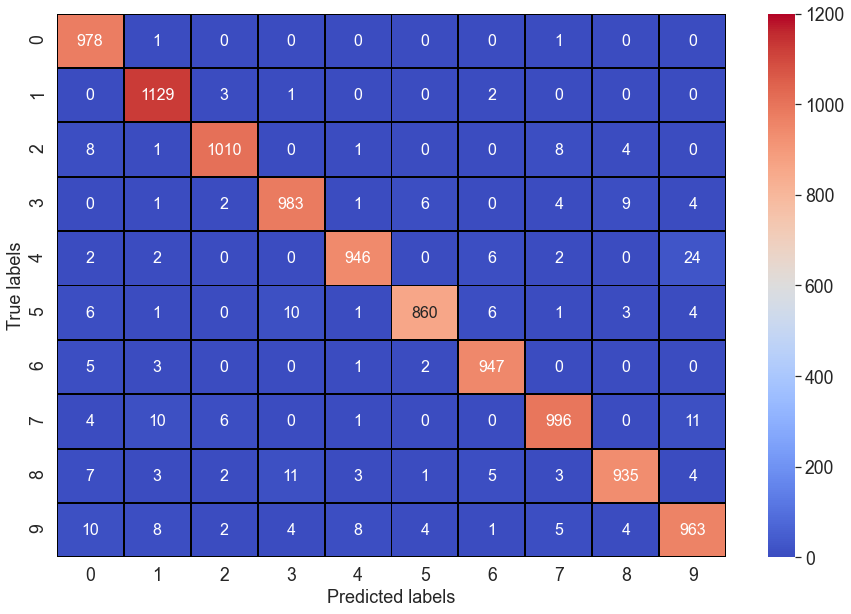

In [121]:
knn = KNNClassifier(k=4, strategy='my_own', metric='cosine', weights=True, test_block_size=5000)
knn.fit(x_train, y_train)
res_simple = knn.predict(x_test)
res_rot_left = knn.predict(x_test_rot_left)
res_rot_right = knn.predict(x_test_rot_right)
res_blur = knn.predict(x_test_bl)
res_matrix = np.vstack((res_simple, res_rot_left, res_rot_right, res_blur))
res = np.apply_along_axis(lambda x: np.unique(x, return_counts=True)[0][np.argmax(np.unique(x, return_counts=True)[1])], axis=0, arr=res_matrix)
cm = confusion_matrix(y_test, res)
fig = plt.figure(figsize=(15, 10))
sns.set(font_scale=1.6)
ax = sns.heatmap(cm, annot=True, cmap='coolwarm', vmin=0, vmax=1200, center=600, linewidths=1, linecolor='black', annot_kws={'size': 16}, fmt='.10g')
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
plt.show()

In [122]:
fig.savefig('fig6.pdf', format='pdf', dpi=600)

In [4]:
x_test_rot_left = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), 5).ravel(), axis=1, arr=x_test)
x_test_rot_right = np.apply_along_axis(lambda x: transform.rotate(x.reshape((28, 28)), -5).ravel(), axis=1, arr=x_test)
x_test_sh_left_x = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), x=-1).ravel(), axis=1, arr=x_test)
x_test_sh_right_x = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), x=1).ravel(), axis=1, arr=x_test)
x_test_sh_down_y = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), y=-1).ravel(), axis=1, arr=x_test)
x_test_sh_up_y = np.apply_along_axis(lambda x: image_shift(x.reshape((28, 28)), y=1).ravel(), axis=1, arr=x_test)

In [5]:
knn = KNNClassifier(k=4, strategy='my_own', metric='cosine', weights=True, test_block_size=5000)
knn.fit(x_train, y_train)
res_simple = knn.predict(x_test)
res_rot_left = knn.predict(x_test_rot_left)
res_rot_right = knn.predict(x_test_rot_right)
res_left_x = knn.predict(x_test_sh_left_x)
res_right_x = knn.predict(x_test_sh_right_x)
res_down_y = knn.predict(x_test_sh_down_y)
res_up_y = knn.predict(x_test_sh_up_y)
res_matrix = np.vstack((res_simple, res_rot_left, res_rot_right, res_left_x, res_right_x, res_down_y, res_up_y))
res = np.apply_along_axis(lambda x: np.unique(x, return_counts=True)[0][np.argmax(np.unique(x, return_counts=True)[1])], axis=0, arr=res_matrix)
print((res == y_test).sum() / res.shape[0])

0.9763


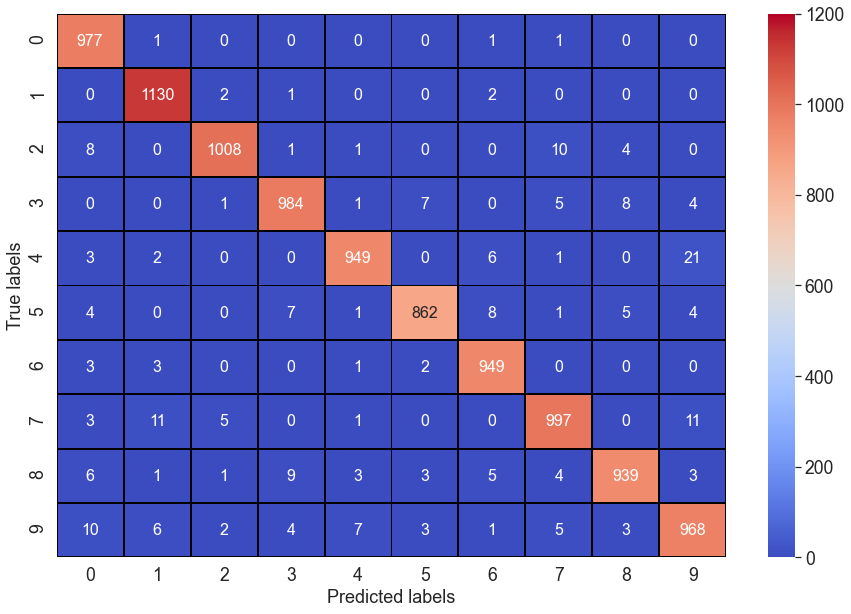

In [6]:
cm = confusion_matrix(y_test, res)
fig = plt.figure(figsize=(15, 10))
sns.set(font_scale=1.6)
ax = sns.heatmap(cm, annot=True, cmap='coolwarm', vmin=0, vmax=1200, center=600, linewidths=1, linecolor='black', annot_kws={'size': 16}, fmt='.10g')
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
plt.show()

In [7]:
fig.savefig('fig6_correct.pdf', format='pdf', dpi=600)